In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%pylab inline
import stmpy
import stmpy.driftcorr as dfc
import scipy as sp
from dset_utils import *
from numpy import *
import matplotlib.patches as patches
import random as rd
import PIL
from tqdm import tqdm
import os
%pylab inline
!pip install tqdm

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws/

/Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws


In [3]:
import PIL
from tqdm import tqdm
import os
import pandas as pd

dpath_root = './obj_detection/frcnn-from-scratch-with-keras/'

!rm -rf ./obj_detection/frcnn-from-scratch-with-keras/train_imgs
!rm -rf ./obj_detection/frcnn-from-scratch-with-keras/test_imgs
!mkdir ./obj_detection/frcnn-from-scratch-with-keras/train_imgs
!mkdir ./obj_detection/frcnn-from-scratch-with-keras/test_imgs

z0 = generate_map(50, 320, 1)
a = numpy.asarray([ ['image_name','type', 'xmin', 'xmax', 'ymin', 'ymax'] ])
n = 100
test_pct = .2
rows = []
for a in tqdm(range(n)):
    z, p, w = generate_image()
    im = PIL.Image.fromarray(z)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    impath = None
    if a<(n*test_pct):
        #impath = os.path.join(os.path.abspath('.'),f'keras-frcnn/test_imgs/{a}.jpg')
        impath = f'test_imgs/{a}.jpg'
    else:
        #impath = os.path.join(os.path.abspath('.'),f'keras-frcnn/train_imgs/{a}.jpg')
        impath = f'train_imgs/{a}.jpg'
    
    im.save(os.path.join(dpath_root,impath))
    bboxes = get_bboxes(p,w).astype(int)
    for b in bboxes:
        rows.append([impath, 'imp']+list(b))
df = pd.DataFrame.from_records(rows)
df.columns = ['fpath', 'type', 'xmin', 'xmax', 'ymin', 'ymax']
df = df[['fpath', 'xmin', 'ymin', 'xmax','ymax','type']]
df.to_csv(os.path.join(dpath_root,'input_data.txt'), index=False, sep=',', header=None)


100%|██████████| 100/100 [00:06<00:00, 14.30it/s]


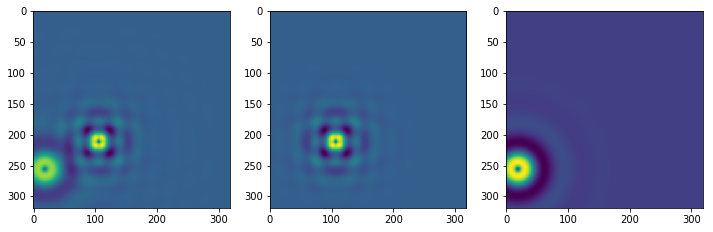

In [9]:
#Params
num = 10
i = 1
d1=random.randint(20,80)/100
d2=random.randint(20,80)/100
d3=random.randint(20,80)/100

x0 = random.random(num) * 50
y0 = random.random(num) * 50

z0 = generate_map(50, 320, 1)

_, imp = get_imp(z0, 50, center=[x0[i], y0[i]], decay=d1, a=10, ratio=5, itype='1')
_, imp2 = get_imp(z0, 50, center=[x0[i+1], y0[i+1]], decay=d1, a=10, ratio=5, itype='0')

imps = imp+imp2
fig, ax = subplots(1,3,figsize=(12,4))
ax[0].imshow(imps)
ax[1].imshow(imp)
ax[2].imshow(imp2)

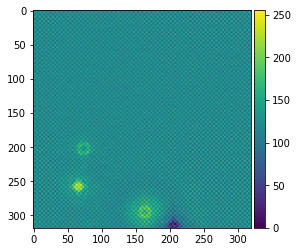

In [55]:
z, p, w = generate_image()
imshow(z)
stmpy.image.add_colorbar(ticks=True, loc=1)

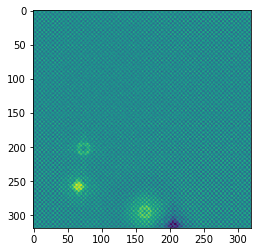

In [56]:
imshow(z)

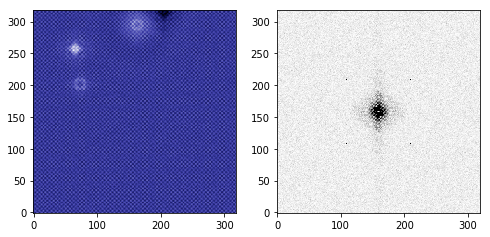

In [57]:
dfc.display(z)

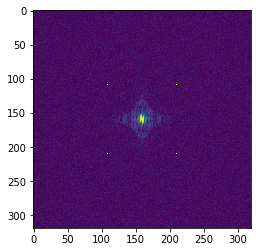

In [47]:
ft = stmpy.tools.fft(z,zeroDC=True)
imshow(ft,clim=(0,50000))

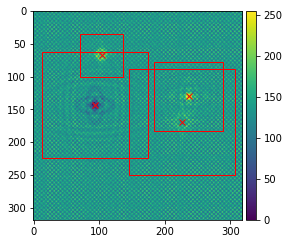

In [30]:

fig, ax = subplots(1,1,figsize=(4,4))
ax.imshow(z)
stmpy.image.add_colorbar(ax=ax,ticks=True, loc=1)
for a in range(len(p)):
    ax.plot(p[a][0],p[a][1], 'rx',ms=6,mew=1)

    rect=patches.Rectangle((p[a][0]-w[a],p[a][1]-w[a]),
                      2*w[a],2*w[a],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [84]:
get_bboxes(p,w)

array([[114.21142655, 191.18601381, 207.23682746, 284.21141472],
       [  0.        ,  93.77183133,  96.27050432, 257.91713756],
       [133.13214688, 204.97509498,   0.        ,  58.98813022],
       [182.0140446 , 229.55717202,  54.13913409, 101.68226151]])

In [87]:
w[0]

38.48729362755438

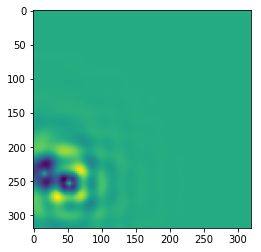

In [26]:
#Params
num = 10
i = 1
d1=random.randint(20,80)/100
d2=random.randint(20,80)/100
d3=random.randint(20,80)/100

x0 = random.random(num) * 50
y0 = random.random(num) * 50

z0 = generate_map(50, 320, 1)

_, imp = get_imp(z0, 50, center=[x0[i], y0[i]], decay=d1, a=10, ratio=5, itype='1')
_, imp2 = get_imp(z0, 50, center=[x0[i+1], y0[i+1]], decay=d1, a=10, ratio=5, itype='0')

imps = imp+imp2

plt.imshow(imps)

In [23]:
def get_mask(imp):
    rsc = (imp-imp.min())/(imp-imp.min()).max()
    plt.imshow(rsc>.3)

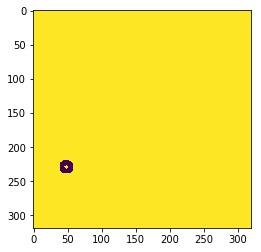

In [24]:
get_mask(imps)

# Generating data for YOLOv3 model #

In [4]:
cd /Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws/

/Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws


In [8]:
z, p, w = generate_image()

In [10]:
p/=len(z0); w/=len(z0)

In [14]:
p

array([[0.3622019 , 0.34949129],
       [0.69490608, 0.10792507],
       [0.21213241, 0.65317107]])

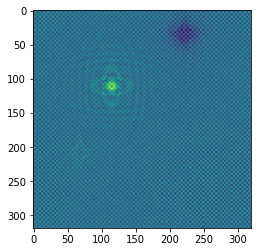

In [9]:
imshow(z)

In [33]:
### import PIL
from tqdm import tqdm
import os
import pandas as pd

dpath_root = './obj_detection/YOLO'

!rm -rf ./obj_detection/YOLO/images/train
!rm -rf ./obj_detection/YOLO/images/test
!mkdir ./obj_detection/YOLO/images/train
!mkdir ./obj_detection/YOLO/images/test

z0 = generate_map(50, 320, 1)
a = numpy.asarray([ ['class', 'x_center', 'y_center', 'width', 'height'] ])
n = 100
test_pct = .2

for a in tqdm(range(n)):
    z, p, w = generate_image()
    p/=len(z0); w/=len(z0)
    p=around(p,4); w=around(w,4)
    im = PIL.Image.fromarray(z)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    impath = None
    if a<(n*test_pct):
        #impath = os.path.join(os.path.abspath('.'),f'keras-frcnn/test_imgs/{a}.jpg')
        impath = f'images/test/{a}.jpg'
        labelpath = f'labels/test/{a}.txt'
    else:
        #impath = os.path.join(os.path.abspath('.'),f'keras-frcnn/train_imgs/{a}.jpg')
        impath = f'images/train/{a}.jpg'
        labelpath = f'labels/train/{a}.txt'
    
    im.save(os.path.join(dpath_root,impath))
    
    rows = []
    for b in range(len(p)):
        t= (p[b][0],p[b][1],w[b],w[b])
        temprow = list(t)
        rows.append(['0']+temprow)
        
    df = pd.DataFrame.from_records(rows)
    df.columns = ['class', 'x_center', 'y_center', 'width', 'height']
    df = df[['class', 'x_center', 'y_center', 'width', 'height']]
    df.to_csv(os.path.join(dpath_root,labelpath), index=False, sep=' ', header=None)


100%|██████████| 100/100 [00:06<00:00, 14.49it/s]


In [20]:
a=(1,2,3)

In [21]:
b=list(a)

In [22]:
b

[1, 2, 3]

In [28]:
p

array([[0.33098154, 0.09113156],
       [0.93251634, 0.22302811],
       [0.55288599, 0.65076258]])

In [31]:
around(p,3)

array([[0.331, 0.091],
       [0.933, 0.223],
       [0.553, 0.651]])

1